In [100]:
## FIGURE SETTINGS 

yummy_figs = [10,6]
gini = 0.5
median_income = 50


## Suppporting equations

def gini_equation(variables):
    alpha, beta = variables
    return [beta / (2 * (alpha + beta - 1)) - gini, 0]

In [162]:
gini = 0
GDPpc = 0

def gini_equation(variables):
    alpha, beta = variables
    equations = [
        beta / (2 * (alpha + beta - 1)) - gini,  # gini equation
        alpha / (alpha + beta) - GDPpc  # GDPpc equation
    ]
    return equations
    
def solve_gini():
    # Initial guess for alpha and beta
    initial_guess = [1, 1]

    # Solve the equation using fsolve
    solution = fsolve(gini_equation, initial_guess)

    # Extract alpha and beta from the solution
    alpha = solution[0]
    beta = solution[1]
    gini = beta / (2 * (alpha + beta - 1))

    return alpha, beta, gini
    
def generate_income_distribution(num_people, median_income, GDPpercap, GINI):
    # Update global GDPpc and gini
    global GDPpc
    global gini
    GDPpc = GDPpercap
    gini = GINI

    # Generate random incomes from the generalized beta distribution centered around the median
    incomes = np.random.beta(solve_gini()[0], solve_gini()[1], size=num_people) # alpha, beta, size

    # Calculate the scaling factor to adjust the median income
    scaling_factor = median_income / np.median(incomes)

    # Scale the incomes based on the desired median income
    incomes *= scaling_factor

    # Sort the incomes in ascending order
    incomes.sort()

    return incomes


In [177]:
X = generate_income_distribution(1000, 50, 0.8, 1)


(array([ 32.,  26.,  29.,  32.,  41.,  39.,  46.,  82., 114., 559.]),
 array([ 0.12352447,  5.49841063, 10.87329679, 16.24818294, 21.6230691 ,
        26.99795526, 32.37284142, 37.74772758, 43.12261374, 48.4974999 ,
        53.87238606]),
 <BarContainer object of 10 artists>)

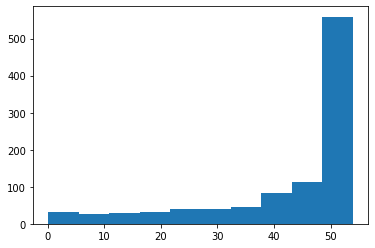

In [178]:
plt.hist(X)

In [155]:
import numpy as np
import scipy.stats as stats

class GiniCalculationError(Exception):
    pass

def calculate_gini(incomes):
    # Calculate Gini coefficient for a list of incomes
    incomes = np.sort(incomes)
    n = len(incomes)
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n  - 1) * incomes)) / (n * np.sum(incomes)))

def generate_income_distribution(num_people, median_income, gini_target):
    alpha = 2  # Initial guess
    for _ in range(1000):  # Limit the number of iterations
        incomes = stats.gamma.rvs(alpha, size=num_people)  # Generate a random income distribution
        incomes *= median_income / np.median(incomes)  # Adjust so that the median income is correct
        gini_current = calculate_gini(incomes)  # Calculate the current Gini coefficient
        if np.isclose(gini_current, gini_target, atol=0.01):  # Check if the current Gini coefficient is close to the target
            return incomes
        elif gini_current < gini_target:  # If the current Gini coefficient is too low, decrease alpha
            alpha *= 0.9
        else:  # If the current Gini coefficient is too high, increase alpha
            alpha *= 1.1

    # If we've reached this point, the desired Gini coefficient was not reached
    error_message = f"Failed to reach target Gini coefficient in 1000 iterations. Current Gini: {gini_current}"
    raise GiniCalculationError(error_message)


In [156]:
X = generate_income_distribution(100, 500, 0.2)

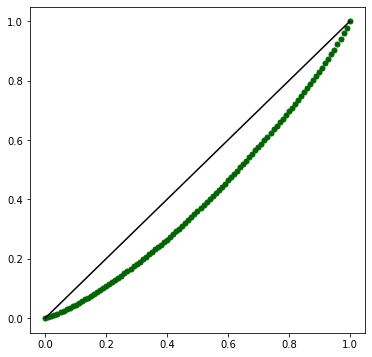

In [157]:
plot_lorenz_curve(X)

In [102]:
import numpy as np
from scipy.optimize import fsolve

def calculate_gini(incomes):
    # this function calculates gini coefficient for given income distribution
    pass

def adjust_alpha_beta(alpha, beta, gini_diff):
    # this function adjust alpha and beta values based on the difference of Gini coefficients
    pass

def generate_income_distribution(num_people, median_income, gini_target):
    # Initial guess for alpha and beta
    alpha, beta = 1, 1

    while True:
        # Generate random incomes from the beta distribution centered around the median
        incomes = np.random.beta(alpha, beta, size=num_people) 

        # Calculate the scaling factor to adjust the median income
        scaling_factor = median_income / np.median(incomes)

        # Scale the incomes based on the desired median income
        incomes *= scaling_factor

        # Sort the incomes in ascending order
        incomes.sort()

        # Calculate the Gini coefficient of the current distribution
        gini_current = calculate_gini(incomes)
        
        print(type(gini_current), gini_current)


        # Check if the current Gini coefficient is close to the target
        if np.isclose(gini_current, gini_target, atol=0.01):
            return incomes
        
        # If the current Gini coefficient is not close to the target, adjust alpha and beta
        alpha, beta = adjust_alpha_beta(alpha, beta, gini_current - gini_target)


In [103]:
generate_income_distribution(100,50,gini)

<class 'NoneType'> None


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [104]:
# ## FIGURE SETTINGS 

# yummy_figs = [10,6]


# from mesa import Model
# from mesa.time import RandomActivation
# import random
# from mesa import Agent
# from mesa.datacollection import DataCollector
# import matplotlib.pyplot as plt
# from scipy.optimize import fsolve


# gdp_r = [-0.3,0.5]

# class Country(Model):
#     def __init__(self, ENERGY_MIX, GDP, NUM_AGENTS):
#         super().__init__()
#         self.ENERGY_MIX = ENERGY_MIX
#         self.GDP = GDP
#         self.NUM_AGENTS = NUM_AGENTS
#         self.GDPpc = self.GDP / self.NUM_AGENTS
#         self.schedule = RandomActivation(self)
#         self.datacollector = DataCollector(
#             model_reporters={"GDP": "GDP"},
#             agent_reporters={"FuelType": "fuel_type"}
#         )

#         # Add agents
#         for i in range(NUM_AGENTS):
#             a = Citizen(i, self)
#             self.schedule.add(a)
#             self.datacollector.collect(self)

#     def step(self):
#         # Update model variables
#         GDP_GROWTH = random.uniform(gdp_r[0], gdp_r[1])
#         self.GDP *= (1 + GDP_GROWTH)
#         self.GDPpc = self.GDP / self.NUM_AGENTS

#         # Update agent variables
#         self.schedule.step()
#         self.datacollector.collect(self)

# class Citizen(Agent):
#     def __init__(self, unique_id, model):
#         super().__init__(unique_id, model)
#         self.fuel_type = random.choice(['BEST', 'MEDIUM', 'DIRT'])

#     def step(self):
#         # Update citizen's energy consumption
#         self.consume_energy()

#     def consume_energy(self):
#         # Define energy consumption logic based on fuel type
#         if self.fuel_type == 'BEST':
#             # Logic for consuming energy with best fuel type
#             pass
#         elif self.fuel_type == 'MEDIUM':
#             # Logic for consuming energy with medium fuel type
#             pass
#         elif self.fuel_type == 'DIRT':
#             # Logic for consuming energy with dirt fuel type
#             pass


# model = Country(20,1000,20)

# for i in range(10):  # Run for 10 steps
#     model.step()

# # Get collected data
# model_data = model.datacollector.get_model_vars_dataframe()
# agent_data = model.datacollector.get_agent_vars_dataframe()


# def equation(variables):
#     alpha, beta = variables
#     return [beta / (2 * (alpha + beta - 1)) - gini, 0]

# # Initial guess for alpha and beta
# initial_guess = [1, 1]

# # Solve the equation using fsolve
# solution = fsolve(equation, initial_guess)

# # Extract alpha and beta from the solution
# alpha = solution[0]
# beta = solution[1]

# print("Gini Coefficient:", beta / (2 * (alpha + beta - 1)))


In [88]:
# model = Country(20,1000,20)

# for i in range(10):  # Run for 10 steps
#     model.step()

# # Get collected data
# model_data = model.datacollector.get_model_vars_dataframe()
# agent_data = model.datacollector.get_agent_vars_dataframe()


In [89]:
# plt.figure(figsize=(10, 6))
# plt.plot(model_data['GDP'])
# plt.title(str('GDP'))
# plt.show()


In [90]:
 def solve_gini():
    # Initial guess for alpha and beta
    initial_guess = [1, 1]

    # Solve the equation using fsolve
    solution = fsolve(gini_equation, initial_guess)

    # Extract alpha and beta from the solution
    alpha = solution[0]
    beta = solution[1]
    gini = beta / (2 * (alpha + beta - 1))

    return alpha, beta, gini

In [91]:
solve_gini()

(1.0, 1.0, 0.5)

In [92]:
import numpy as np

def generate_income_distribution(num_people, median_income):

    # Generate random incomes from the generalized beta distribution centered around the median
    incomes = np.random.beta(solve_gini()[0], solve_gini()[1], size=num_people) # alpha, beta, size

    # Calculate the scaling factor to adjust the median income
    scaling_factor = median_income / np.median(incomes)

    # Scale the incomes based on the desired median income
    incomes *= scaling_factor

    # Sort the incomes in ascending order
    incomes.sort()

    return incomes


In [93]:
generate_income_distribution(1000, 50)

array([5.56701801e-02, 8.11335327e-02, 1.03774165e-01, 1.04223438e-01,
       3.75404664e-01, 4.05610229e-01, 6.99452986e-01, 9.22140035e-01,
       1.14333238e+00, 1.18162556e+00, 1.21714924e+00, 1.42513173e+00,
       1.58245052e+00, 1.62221942e+00, 1.63716717e+00, 1.66843548e+00,
       1.74599774e+00, 2.02590960e+00, 2.04251874e+00, 2.15333350e+00,
       2.21860348e+00, 2.28136605e+00, 2.64977248e+00, 2.66047625e+00,
       2.72609676e+00, 2.75548223e+00, 2.83745390e+00, 2.88099459e+00,
       3.02914257e+00, 3.23851915e+00, 3.28642917e+00, 3.43520751e+00,
       3.49480545e+00, 3.50111728e+00, 3.52914463e+00, 3.62639843e+00,
       3.82949507e+00, 3.83645276e+00, 3.98424043e+00, 4.00203339e+00,
       4.01534404e+00, 4.08240806e+00, 4.17169580e+00, 4.19184205e+00,
       4.22051964e+00, 4.23184056e+00, 4.34104477e+00, 4.42889328e+00,
       4.98088056e+00, 5.00325697e+00, 5.13295796e+00, 5.23916093e+00,
       5.39152216e+00, 5.46300333e+00, 5.50223158e+00, 5.68359120e+00,
      

In [144]:
def plot_lorenz_curve(X, yummy_figs = (6, 6)):

    X_sorted = np.sort(X)  # Sort the incomes
    lorenz = np.cumsum(X_sorted) / np.sum(X_sorted)
    lorenz = np.insert(lorenz, 0, 0)
    lorenz[0], lorenz[-1]

    fig, ax = plt.subplots(figsize=[yummy_figs[0],yummy_figs[1]])
    ax.scatter(np.arange(lorenz.size)/(lorenz.size-1), lorenz, 
            marker='.', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')


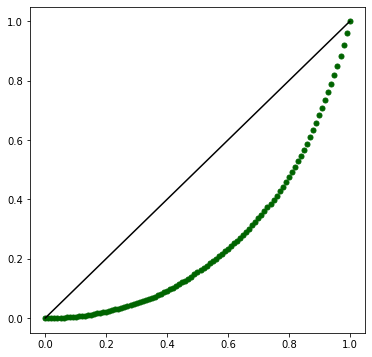

In [145]:
plot_lorenz_curve(X)